## Setup

In [1]:
pip install opencv-python


The following command must be run outside of the IPython shell:

    $ pip install opencv-python

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [66]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

%matplotlib inline

## Preprocessing

(728, 970, 3)


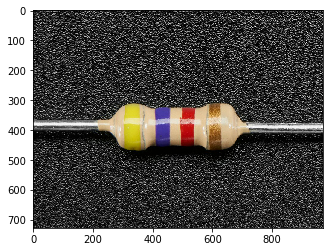

In [168]:
img = cv2.imread("res3.jpg")
print(img.shape)

plt.figure(0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

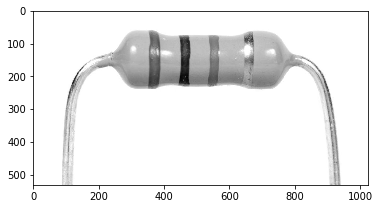

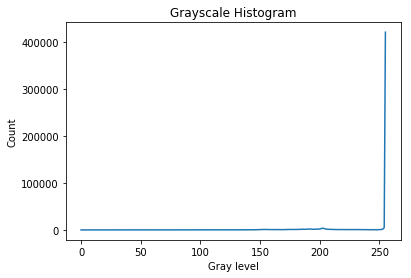

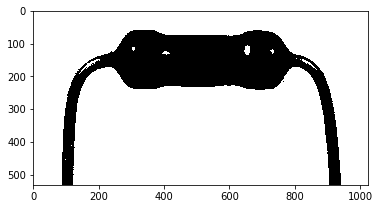

In [169]:
# Grayscale
gray = cv2.imread("res.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(0)
plt.imshow(gray, cmap='gray')


# Plot histogram
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.figure(1)
plt.plot(hist) 
plt.title("Grayscale Histogram")
plt.xlabel("Gray level")
plt.ylabel("Count")
plt.show()


# Binarize image by thresholding
threshold = 250
bin_img = gray.copy()
bin_img[bin_img < threshold] = 0
bin_img[bin_img >= threshold] = 255

plt.figure(2)
plt.imshow(bin_img, cmap='gray')

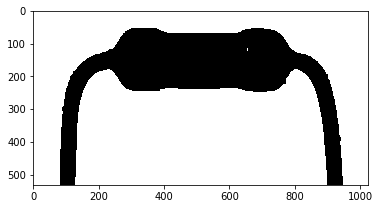

In [69]:
# Mask
kernel = np.ones((5,5), np.uint8) 
mask = cv2.erode(bin_img, kernel, iterations=3) 


plt.figure(0)
plt.imshow(mask, cmap='gray')


In [70]:
height, width = mask.shape
print(mask[0][0])


def findResistorMeat(mask):
    min_region_size = 100
    black_flag = False
    result = []
    
    # Find top left and right corners
    for i in range(height):
        start = (0,0)
        stop = (0,0)
        black_count = 0

        for j in range(width):
            pixel = mask[i][j]
            
            # Transition from white to black
            if(!black_flag and pixel == 0):
                
                # Check if hit second black region
                if(stop !=(0,0)):
                    break
                
                start = (i,j)
                black_flag = True

            if(black_flag):
                black_count += 1
            
            # Transition from black to white
            if(black_flag and pixel == 255):
                stop = (i,j)
                black_flag = False

        if(black_count >= min_region_size):
            result.append(start)
            result.append(stop)
    
    
    # Find bottom midpoint
        

SyntaxError: invalid syntax (<ipython-input-70-62d4be1847c0>, line 20)

# Color Identification

## SVM Color Prediction

In [85]:
from sklearn import svm

In [184]:
colors = [([255, 0, 0], 'red'), ([255, 64, 0], 'red'), ([255, 0, 64], 'red'), ([210, 45, 45], 'red'), ([255, 102, 102], 'red'), ([250, 114, 144], 'red'), ([246, 91, 103], 'red'), ([246, 40, 103], 'red'), ([182, 14, 17], 'red'), ([164, 35, 3], 'red'),
          ([255, 128, 0], 'orange'), ([250, 100, 0], 'orange'), ([245, 142, 35], 'orange'), ([245, 105, 35], 'orange'), ([245, 144, 35], 'orange'), ([224, 98, 29], 'orange'), ([212, 126, 68], 'orange'), ([217, 116, 57], 'orange'), ([220, 104, 42], 'orange'), ([223, 96, 29], 'orange'), ([226, 93, 23], 'orange'), ([224, 94, 23], 'orange'), ([224, 99, 30], 'orange'), ([223, 101, 33], 'orange'), ([221, 110, 44], 'orange'), ([215, 121, 57], 'orange'),
          ([255, 255, 0], 'yellow'), ([250, 250, 0], 'yellow'), ([250, 254, 144], 'yellow'), ([250, 254, 98], 'yellow'), ([216, 196, 104], 'yellow'), ([216, 198, 93], 'yellow'), ([216, 202, 76], 'yellow'), ([215, 203, 61], 'yellow'), ([217, 206, 66], 'yellow'), ([219, 210, 64], 'yellow'), ([220, 213, 73], 'yellow'), ([223, 215, 72], 'yellow'),
          ([0, 255, 0], 'green'), ([128, 255, 0], 'green'), ([64, 255, 0], 'green'), ([0, 255, 64], 'green'), ([0, 255, 128], 'green'), ([0, 102, 0], 'green'), ([130, 254, 98], 'green'), ([64, 254, 98], 'green'), ([64, 201, 98], 'green'), ([64, 201, 42], 'green'), ([119, 141, 47], 'green'), ([152, 146, 66], 'green'), ([89, 139, 35], 'green'), ([70, 140, 31], 'green'), ([63, 141, 30], 'green'), ([76, 149, 35], 'green'),
          ([0, 0, 255], 'blue'), ([0, 255, 255], 'blue'), ([0, 191, 255], 'blue'), ([0, 128, 255], 'blue'), ([0, 64, 255], 'blue'), ([64, 0, 255], 'blue'), ([75, 96, 116], 'blue'), ([53, 87, 120], 'blue'), ([35, 81, 124], 'blue'), ([36, 80, 126], 'blue'), ([35, 81, 126], 'blue'), ([41, 87, 130], 'blue'), ([43, 90, 131], 'blue'), ([37, 85, 128], 'blue'),
          ([191, 0, 255], 'violet'), ([255, 0, 255], 'violet'), ([255, 0, 191], 'violet'), ([77, 0, 57], 'violet'), ([250, 114, 185], 'violet'), ([250, 114, 234], 'violet'), ([250, 143, 234], 'violet'), ([182, 76, 127], 'violet'), 
          ([153, 102, 0], 'brown'), ([128, 85, 0], 'brown'), ([102, 68, 0], 'brown'),
          ([179, 134, 0], 'beige'), ([211, 160, 102], 'beige'), ([211, 186, 102], 'beige'), ([224, 160, 102], 'beige'), ([197, 160, 102], 'beige'), ([206, 177, 117], 'beige'), ([206, 177, 144], 'beige'), ([250, 192, 144], 'beige'), ([215, 180, 143], 'beige'), ([212, 175, 136], 'beige'), ([211, 170, 130], 'beige'), ([207, 167, 123], 'beige'), ([205, 162, 115], 'beige'), ([201, 157, 107], 'beige'), ([188, 157, 97], 'beige'), ([168, 155, 83], 'beige'), ([119, 108, 88], 'beige'), ([114, 102, 82], 'beige'), ([124, 112, 91], 'beige'), ([131, 119, 98], 'beige'),
          ([0, 0, 0], 'black'), ([26, 26, 26], 'black'), ([51, 51, 51], 'black'),
          ([115, 115, 115], 'gray'), ([89, 89, 89], 'gray'), ([79, 79, 79], 'gray'), ([84, 84, 84], 'gray'), ([87, 87, 87], 'gray'), ([76, 76, 76], 'gray'), ([94, 94, 92], 'gray'),
          ([255, 255, 255], 'white'), ([240,240,240], 'white') 
         ]

res = [[ i for i, j in colors ], 
       [ j for i, j in colors ]]
X = res[0]
y = res[1]

#clf = svm.SVC(gamma=1e-6)

#found this configuration to work best -- it's possible there's a better one, but this actually worked so I'm rollin w/ it
clf = svm.SVC(C=100, gamma=1e-6)
#clf = svm.LinearSVC()
clf.fit(X, y)
clf.predict([[37, 80, 126]])

array(['blue'],
      dtype='<U6')

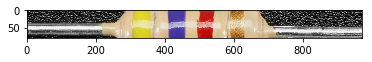

In [176]:
# Extract horizontal slice from picture
copy = img
sliceValue = 330
sliceWidth = 80

copy = copy[sliceValue: sliceValue+sliceWidth, :,:]
copy = cv2.cvtColor(copy, cv2.COLOR_BGR2RGB)

plt.figure(0)
plt.imshow(copy)

## Introducing column averaging

<Figure size 432x288 with 0 Axes>

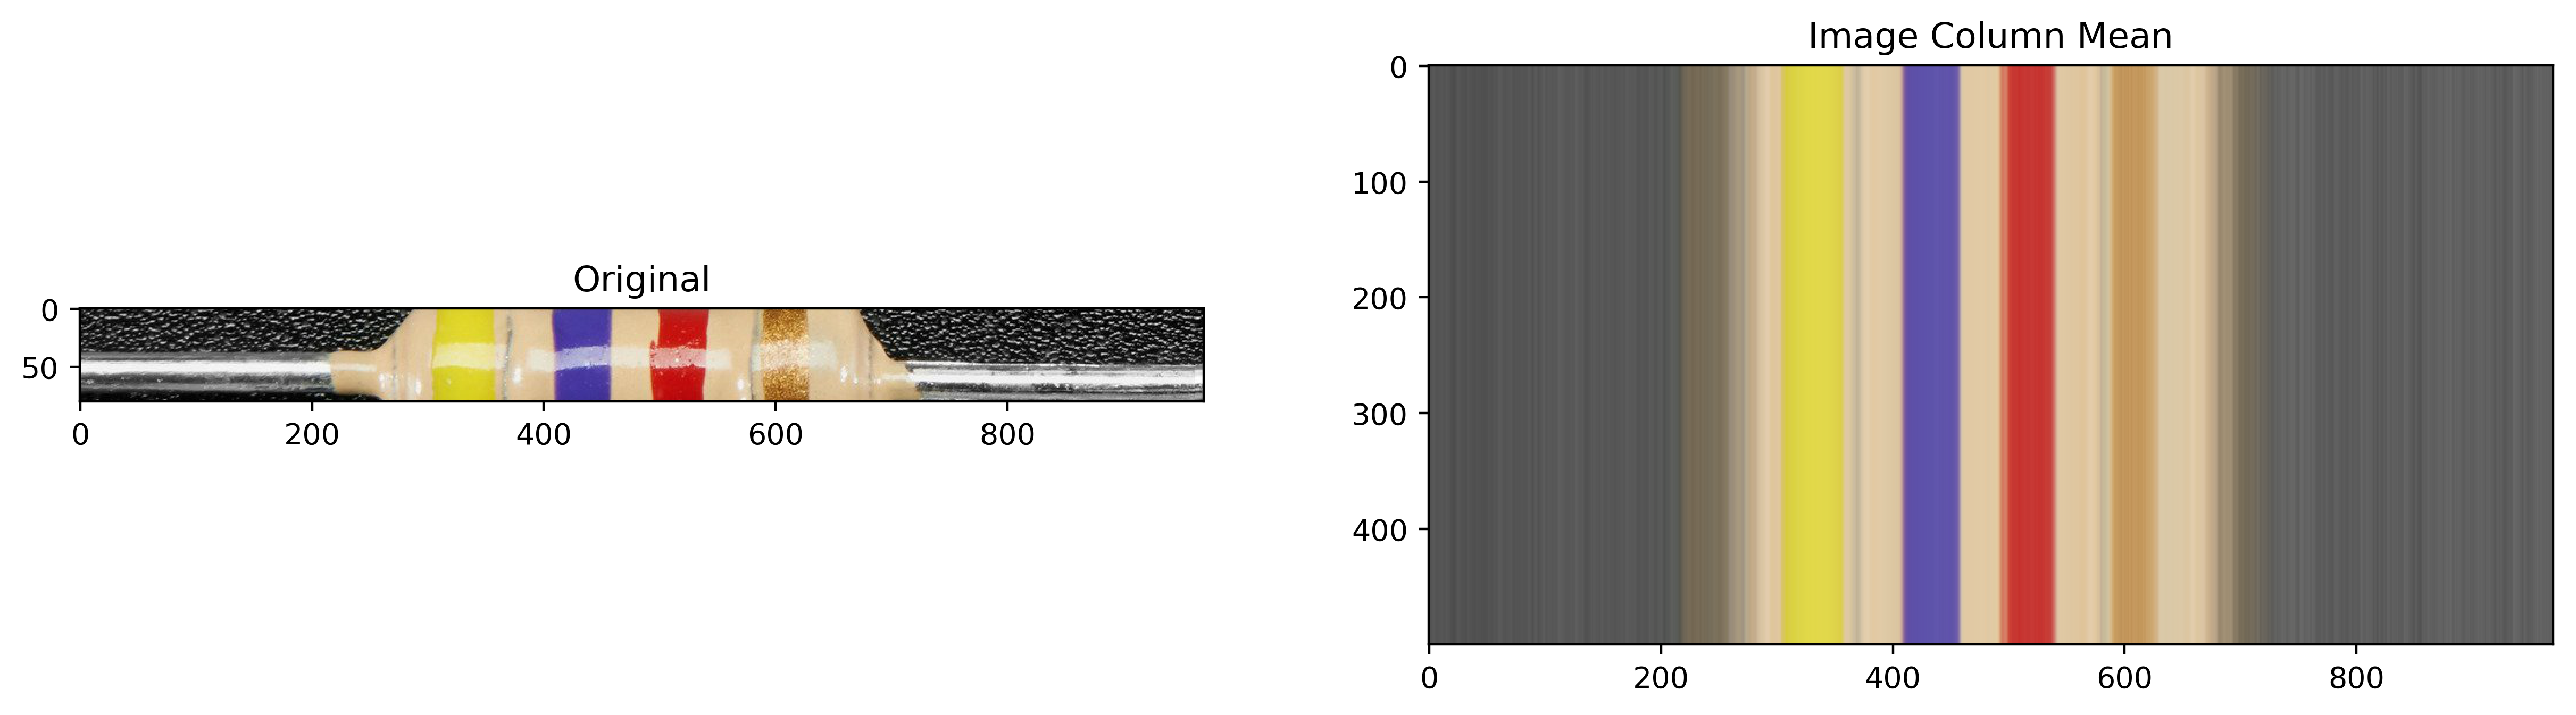

In [189]:
from typing import List
def columnsAvg(img: List[List[List[np.uint8]]]) -> List[List[np.uint8]]:
    image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    columns = []
    #now take mean across rows (originally columns)
    for col in image:
        avgs = np.array([np.mean(col[:,0]), np.mean(col[:,1]), np.mean(col[:,2])], dtype=np.uint8)
        columns.append(avgs)
    return np.array(columns)

colAvg = columnsAvg(copy)
predictions = clf.predict(colAvg)
"""for i, p in enumerate(predictions):
    print("{}:\t{}".format(i, p))"""

#plotting figures
fig = plt.figure()
plt.subplots(1, 2, figsize=(15,15), dpi=400)
plt.subplot(1, 2, 1, title="Original")
plt.imshow(copy)

plt.subplot(1, 2, 2, title="Image Column Mean")
plt.imshow([colAvg]*500)

In [190]:
# Color identification
line = colAvg
print(line.shape)

foundColorsSet = set()
foundColorsArray = []


i = 0
batchSize = 1
regionSize = 10
startFlag = False
increment = 1

allColors = clf.predict(line)

while(i + regionSize < len(allColors)):
    # Get current pixel color
    color = allColors[i]
    
    # Check consistent color sequence of region size
    for x in range(i, i + regionSize):
        c = allColors[x]
        
        if(color != c):
            color = None
            break
    
    print(i, color)
    
    # If inconsistent color, then move on
    if(color is None):
        i += increment
        continue
    
    if(color == 'beige'):
        startFlag = True
    
    #change: if hit beige, reset color set since we can hit same color band
    
    if(startFlag and color != 'white' and color != 'beige'):
        if(color not in foundColorsSet):
            foundColorsSet.add(color)
            foundColorsArray.append(color)
    i += increment


print("Colors found:\t", foundColorsArray)



(970, 3)
0 gray
1 gray
2 gray
3 gray
4 gray
5 gray
6 gray
7 gray
8 gray
9 gray
10 gray
11 gray
12 gray
13 gray
14 gray
15 gray
16 gray
17 gray
18 gray
19 gray
20 gray
21 gray
22 gray
23 gray
24 gray
25 gray
26 gray
27 gray
28 gray
29 gray
30 gray
31 gray
32 gray
33 gray
34 gray
35 gray
36 gray
37 gray
38 gray
39 gray
40 gray
41 gray
42 gray
43 gray
44 gray
45 gray
46 gray
47 gray
48 gray
49 gray
50 gray
51 gray
52 gray
53 gray
54 gray
55 gray
56 gray
57 gray
58 gray
59 gray
60 gray
61 gray
62 gray
63 gray
64 gray
65 gray
66 gray
67 gray
68 gray
69 gray
70 gray
71 gray
72 gray
73 gray
74 gray
75 gray
76 gray
77 gray
78 gray
79 gray
80 gray
81 gray
82 gray
83 gray
84 gray
85 gray
86 gray
87 gray
88 gray
89 gray
90 gray
91 gray
92 gray
93 gray
94 gray
95 gray
96 gray
97 gray
98 gray
99 gray
100 gray
101 gray
102 gray
103 gray
104 gray
105 gray
106 gray
107 gray
108 gray
109 gray
110 gray
111 gray
112 gray
113 gray
114 gray
115 gray
116 gray
117 gray
118 gray
119 gray
120 gray
121 gray
122

## Calculate Resistance

In [191]:
colorValues = {
    'black': 0,
    'brown': 1,
    'red': 2,
    'orange': 3,
    'yellow': 4,
    'green': 5,
    'blue': 6,
    'purple': 7,
    'gray': 8,
    'white': 9
}

print(foundColorsArray)

values = [colorValues[c] for c in foundColorsArray]
print(values)

['yellow', 'blue', 'red', 'gray']
[4, 6, 2, 8]


In [192]:
resistance = 0
values = [colorValues[c] for c in foundColorsArray]

"""numBands = len(foundColorsArray)

if(numBands == 3):    
    resistance = (values[0]*10 + values[1]) * (10 ** values[2])
    print(resistance)"""

#just treat everything as 3-band resistor, ignoring tolerance

    
    

'numBands = len(foundColorsArray)\n\nif(numBands == 3):    \n    resistance = (values[0]*10 + values[1]) * (10 ** values[2])\n    print(resistance)'